# Jarosław Sokołowski 66133
# Model rozpoznawania obrazów owoców Truskawiki i winogrona
Wykorzystano dataset z [Kaggle](https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification/data) w celu uproszczenia projektu i skrócenia treningu.
Skrypt jest modyfikacją udostępnionego na zajęciach. Model trenowany był na maszynie lokalnej.

# Tworzenie Splotowej sieci neuronowej

Splotowa sieć neuronowa (CNN, od ang. Convolutional Neural Network) to rodzaj głębokiej sieci neuronowej, która jest szczególnie skuteczna w analizie danych mających postać siatki, takich jak obrazy. CNN są szeroko stosowane w przetwarzaniu obrazów i wideo, rozpoznawaniu wzorców oraz w systemach sztucznej inteligencji do analizy wizualnej.

#### Główne elementy splotowej sieci neuronowej:
- Warstwy splotowe (Convolutional Layers):
W tych warstwach wykorzystuje się operacje splotu, które polegają na przesuwaniu małej macierzy (filtru lub jądra) przez wejściową macierz danych (np. obraz), generując mapę cech. Proces ten pomaga wydobyć istotne cechy z obrazów, takie jak krawędzie, kształty czy tekstury.
- Warstwy łączenia (Pooling Layers):
Często stosowane po warstwach splotowych, mają za zadanie redukować wymiary przestrzenne (szerokość, wysokość) mapy cech, co pomaga zmniejszyć ilość parametrów i obliczeń w sieci. Najczęściej używanym typem jest pooling maksymalizujący (max pooling), który wybiera maksymalną wartość z każdego fragmentu mapy cech.
- Warstwy normalizacji (Normalization Layers):
Te warstwy normalizują dane wejściowe lub wyjściowe z warstw, co może przyczynić się do lepszej szybkości konwergencji podczas uczenia oraz do zwiększenia stabilności sieci.
- Warstwy pełnego połączenia (Fully Connected Layers):
W tych warstwach każdy neuron jest połączony z każdym neuronem w poprzedniej warstwie, co pozwala na integrację wyuczonych cech do finalnej klasyfikacji lub regresji.

#### Zastosowania:
- Rozpoznawanie obrazów: CNN są podstawą wielu systemów rozpoznawania obrazów, od identyfikacji twarzy po automatyczne oznaczanie zdjęć.
- Analiza wideo: Zastosowanie CNN w rozpoznawaniu akcji, śledzeniu ruchu i innych zadaniach związanych z wideo.
- Rozpoznawanie mowy i przetwarzanie języka naturalnego: Choć głównie stosowane w przetwarzaniu obrazów, CNN znajdują także zastosowanie w analizie sekwencyjnej, np. w rozpoznawaniu mowy.
- Systemy autonomiczne: W samochodach autonomicznych, CNN mogą pomóc w interpretacji wizualnej otoczenia pojazdu do nawigacji i unikania przeszkód.

Splotowe sieci neuronowe dzięki swojej zdolności do efektywnego przetwarzania dużych ilości danych wizualnych i wydobywania z nich kluczowych informacji, zrewolucjonizowały wiele dziedzin technologii.

## Instalowanie pakietów

In [2]:
!pip3 install tensorflow numpy scikit-learn matplotlib

You should consider upgrading via the 'C:\Users\Admin\.pyenv\pyenv-win\versions\3.10.0\python.exe -m pip install --upgrade pip' command.


### Importowanie niezbędnych pakietów

In [3]:
# Import biblioteki numpy do pracy z tablicami i wykonywania operacji numerycznych
import numpy as np
# Import biblioteki TensorFlow, która jest podstawową biblioteką do pracy z sieciami neuronowymi
import tensorflow as tf
# Import API keras z tensorflow, które upraszcza wiele zadań związanych z sieciami neuronowymi
from tensorflow import keras
# Import modelu Sequential z Keras; jest to liniowy stos warstw sieci neuronowej
from tensorflow.keras.models import Sequential
# Import różnych rodzajów warstw i operacji z Keras, które można użyć w sieciach neuronowych
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
# Import optymalizatora Adam, metody, która zmienia atrybuty sieci neuronowej, takie jak wagi i szybkość uczenia się, aby zmniejszyć straty
from tensorflow.keras.optimizers import Adam
# Import categorical_crossentropy, funkcji straty używanej dla klas, które są większe niż 2
from tensorflow.keras.metrics import categorical_crossentropy
# Import ImageDataGenerator z Keras do augmentacji obrazów na potrzeby treningu, co poprawia dokładność modelu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import confusion_matrix z sklearn.metrics do oceny dokładności klasyfikacji
from sklearn.metrics import confusion_matrix
# Import itertools dla efektywnego tworzenia pętli
import itertools
# Import os, biblioteki używanej do interakcji z systemem operacyjnym, nawigacji po folderach i zarządzania plikami
import os
# Import shutil, biblioteki używanej do operacji na plikach, takich jak kopiowanie i usuwanie
import shutil
# Import random do generowania liczb losowych
import random
# Import glob, biblioteki używanej do odzyskiwania plików/nazw ścieżek pasujących do określonego wzorca
import glob
# Import pyplot z matplotlib, biblioteki do tworzenia wykresów
import matplotlib.pyplot as plt
import PIL
# Import warnings do kontroli komunikatów ostrzegawczych
import warnings
# Ustaw filtr ostrzeżeń na ignorowanie przyszłych ostrzeżeń, często używane do tłumienia ostrzeżeń o przestarzałych funkcjach
warnings.simplefilter(action='ignore', category=FutureWarning)
# Konfiguracja matplotlib do wyświetlania rysunków osadzonych w notatniku
%matplotlib inline

### Wykrywanie procesora graficznego

In [5]:
# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.
# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow
# do korzystania z określonych urządzeń sprzętowych.
physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne
if physical_devices:
    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.
    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie
    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.
    print("Num GPUs Available: ", len(physical_devices))
else:
    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.
    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


### Przygotowanie danych  
Obrazy zawarte w katalogu data/cats-vs-dogs są losową podgrupą pełnego zestawu danych o kotach i psach z następującej rywalizacji Kaggle.


In [14]:
path_to_data = 'D:\\guzik\\Fruits Classification'
os.chdir(path_to_data)

In [15]:
# Definiowanie ścieżki do danych treningowych
train_path = 'D:\\guzik\\Fruits Classification\\train'
# Definiowanie ścieżki do danych walidacyjnych
valid_path = 'D:\\guzik\\Fruits Classification\\valid'
# Definiowanie ścieżki do danych testowych
test_path = 'D:\\guzik\\Fruits Classification\\test'

In [16]:
# Tworzenie generatora danych dla zestawu treningowego z preprocessowaniem specyficznym dla VGG16
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['Strawberry', 'Grape'], batch_size=10)

# Tworzenie generatora danych dla zestawu walidacyjnego z preprocessowaniem specyficznym dla VGG16
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['Strawberry', 'Grape'], batch_size=10)

# Tworzenie generatora danych dla zestawu testowego z preprocessowaniem specyficznym dla VGG16 i bez przetasowania
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['Strawberry', 'Grape'], batch_size=10, shuffle=False)


Found 3880 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [17]:
# Sprawdzenie, czy liczba próbek w danych treningowych wynosi 1000
assert train_batches.n == 3880
# Sprawdzenie, czy liczba próbek w danych walidacyjnych wynosi 200
assert valid_batches.n == 80
# Sprawdzenie, czy liczba próbek w danych testowych wynosi 100
assert test_batches.n == 40
# Sprawdzenie, czy liczba klas jest taka sama dla zestawów treningowych, walidacyjnych i testowych, oraz czy wynosi 2
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2


### Wyjaśnienie kodu:
- `assert` to instrukcja w Pythonie używana do sprawdzenia, czy dany warunek jest prawdziwy. Jeśli warunek jest fałszywy, program zwróci błąd AssertionError.
- Każde z tych stwierdzeń assert weryfikuje, czy liczba obrazów w odpowiednich generatorach danych (treningowych, walidacyjnych, testowych) oraz liczba klas odpowiadają oczekiwaniom. Jest to przydatne do upewnienia się, że dane zostały załadowane poprawnie i są gotowe do użycia w modelu.

In [18]:
# Pobranie jednego batcha obrazów i etykiet z danych treningowych

imgs, labels = next(train_batches)

In [19]:
# Definicja funkcji do wyświetlania obrazów w formie siatki
def plotImages(images_arr):
    # Tworzenie figury i osi dla wykresów
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    # Spłaszczenie listy osi dla łatwiejszego iterowania
    axes = axes.flatten()
    # Pętla przez pary obrazów i odpowiadające im osie
    for img, ax in zip(images_arr, axes):
        # Wyświetlenie obrazu na danej osi
        ax.imshow(img)
        # Wyłączenie osi na wykresie
        ax.axis('off')
    # Dostosowanie layoutu, aby elementy nie nakładały się na siebie
    plt.tight_layout()
    # Wyświetlenie wykresu
    plt.show()

### Kluczowe punkty:
- Pobranie danych: Linijka imgs, labels = next(train_batches) pobiera następny zestaw (batch) obrazów i etykiet z generatora train_batches.
- Definicja funkcji plotImages: Ta funkcja przyjmuje listę obrazów, tworzy dla nich wykresy i wyświetla je w formie siatki 1x10.
- Iteracja i wyświetlanie obrazów: W pętli for każdy obraz jest wyświetlany na odpowiadającej mu osi, z wyłączonymi oznaczeniami osi (ax.axis('off')).
- Dostosowanie wyglądu: plt.tight_layout() zapobiega nakładaniu się elementów graficznych na siebie, co jest przydatne przy wyświetlaniu wielu wykresów.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..147.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-103.939..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-122.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-117.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data

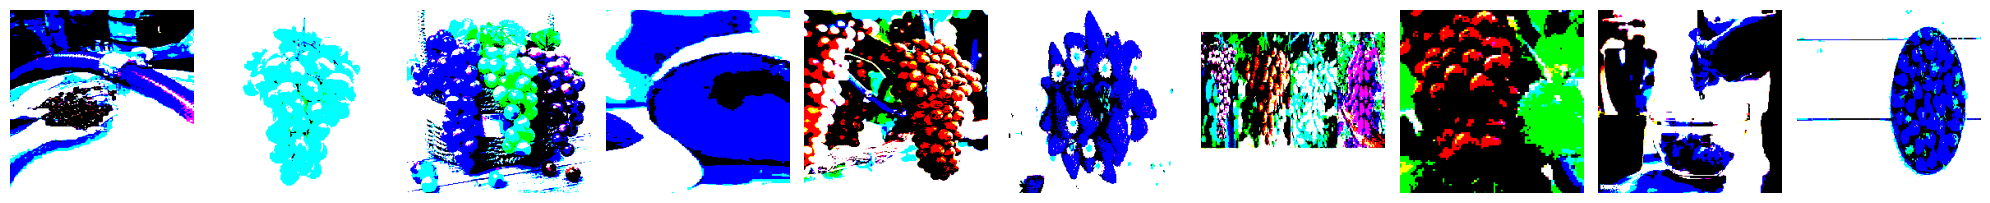

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [20]:
plotImages(imgs)
print(labels)

### Budowanie i trenowanie CNN

In [21]:

# Tworzenie modelu sekwencyjnego z wykorzystaniem obiektu Input jako pierwszej warstwy
model = Sequential([
    # Dodanie warstwy Input określającej kształt wejściowy
    # Input(shape=(224, 224, 3)), # Błąd importu funkcji, zastosowano starszą implementację wejścia
    # Dodanie pierwszej warstwy konwolucyjnej bez podawania input_shape
    Conv2D(input_shape=(224, 224, 3), filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    # Dodanie warstwy MaxPooling
    MaxPool2D(pool_size=(2, 2), strides=2),
    # Dodanie drugiej warstwy konwolucyjnej
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    # Dodanie kolejnej warstwy MaxPooling
    MaxPool2D(pool_size=(2, 2), strides=2),
    # Spłaszczenie danych przed przekazaniem do warstwy Dense
    Flatten(),
    # Dodanie warstwy Dense z dwoma jednostkami wyjściowymi i funkcją aktywacji softmax
    Dense(units=2, activation='softmax'),
])

# Zamiast definiować `input_shape` w pierwszej warstwie `Conv2D`, używamy `Input`, co jest zalecane.

C:\Users\Admin\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Podsumowanie modelu
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │         401,410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420,802 (1.61 MB)

 Trainable params: 420,802 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Kompilacja modelu z określeniem optymalizatora, funkcji straty i metryk
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Trenowanie modelu z określeniem danych treningowych, walidacyjnych, liczby epok i trybu wyświetlania
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10


C:\Users\Admin\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


388/388 - 57s - 148ms/step - accuracy: 0.7884 - loss: 8.1746 - val_accuracy: 0.7500 - val_loss: 3.5470
Epoch 2/10
388/388 - 43s - 110ms/step - accuracy: 0.9178 - loss: 0.6794 - val_accuracy: 0.8375 - val_loss: 0.6113
Epoch 3/10
388/388 - 42s - 109ms/step - accuracy: 0.9693 - loss: 0.1164 - val_accuracy: 0.8750 - val_loss: 0.7598
Epoch 4/10
388/388 - 43s - 110ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.8500 - val_loss: 1.1321
Epoch 5/10
388/388 - 43s - 111ms/step - accuracy: 0.9874 - loss: 0.0524 - val_accuracy: 0.8125 - val_loss: 0.9406
Epoch 6/10
388/388 - 42s - 109ms/step - accuracy: 0.9902 - loss: 0.0400 - val_accuracy: 0.7500 - val_loss: 2.4007
Epoch 7/10
388/388 - 43s - 110ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9125 - val_loss: 0.4812
Epoch 8/10
388/388 - 42s - 108ms/step - accuracy: 0.9866 - loss: 0.0547 - val_accuracy: 0.8500 - val_loss: 1.2375
Epoch 9/10
388/388 - 42s - 108ms/step - accuracy: 0.9936 - loss: 0.0222 - val_accuracy: 0.9250 - va

### Predict (Przewidywanie)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..131.32].
Clipping input data t

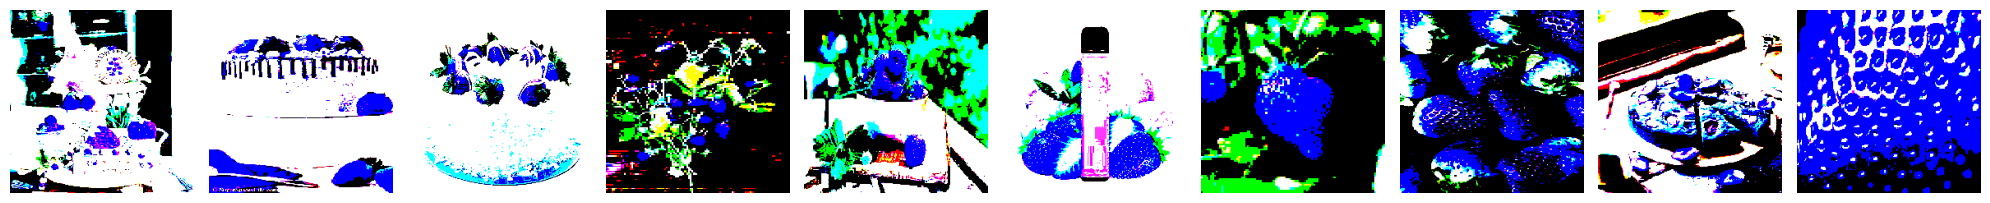

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [27]:
# Pobieranie jednego batcha obrazów i etykiet z danych testowych
test_imgs, test_labels = next(test_batches)
# Wyświetlanie obrazów z testowego batcha
plotImages(test_imgs)
# Wydrukowanie etykiet obrazów z testowego batcha
print(test_labels)

In [28]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
# Przewidywanie klas na podstawie obrazów z testowego batcha
predictions = model.predict(x=test_batches, verbose=0)

In [32]:
# Zaokrąglenie przewidywań do najbliższej liczby całkowitej
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [33]:
# Tworzenie macierzy pomyłek do analizy dokładności przewidywań
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):
    """
    Ta funkcja drukuje i rysuje macierz pomyłek.
    Normalizację można zastosować ustawiając `normalize=True`.
    """

    # Rysuje macierz pomyłek jako obraz w kolorach określonych przez mapę kolorów 'cmap'.
    # 'interpolation' ustawione na 'nearest' zapobiega jakimkolwiek próbom interpolacji między punktami.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Ustawia tytuł wykresu. Tytuł pojawia się nad macierzą pomyłek.
    plt.title(title)
    
    # Dodaje pasek kolorów po prawej stronie wykresu, który pokazuje zależność między wartościami macierzy a kolorami.
    plt.colorbar()
    
    # Tworzy listę indeksów od 0 do liczby klas - używane do oznaczania podziałek na osiach X i Y.
    tick_marks = np.arange(len(classes))
    
    # Ustawia etykiety na osi X (poziomej) z listy 'classes', obracając je o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)
    
    # Ustawia etykiety na osi Y (pionowej) z listy 'classes'.
    plt.yticks(tick_marks, classes)

    # Jeśli ustawiono normalizację, skaluje wartości w macierzy do zakresu 0-1.
    if normalize:
        # Normalizacja polega na podzieleniu każdej wartości wiersza przez sumę tego wiersza, 
        # co przekształca liczby w prawdopodobieństwa klasyfikacji dla każdej klasy.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Znormalizowana macierz pomyłek")
    else:
        print('Macierz pomyłek bez normalizacji')

    # Drukuje macierz pomyłek w konsoli, co jest przydatne do analizy tekstowej.
    print(cm)

    # Ustala próg koloru tekstu na macierzy w zależności od maksymalnej wartości w macierzy.
    # Tekst będzie biały, jeśli wartość jest wyższa niż połowa maksymalnej wartości, w przeciwnym razie czarny.
    thresh = cm.max() / 2.
    
    # Iteruje przez wszystkie elementy macierzy (indeksy i wartości)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodaje wartości do każdej komórki macierzy. 'format' kontroluje, jak wartości są formatowane (np. 2 miejsca po przecinku).
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",  # Tekst wyśrodkowany w komórce
                 color="white" if cm[i, j] > thresh else "black")  # Warunek koloru tekstu

    # Ajustuje układ, aby zapewnić, że wszystko jest czytelne i nic się nie nakłada.
    plt.tight_layout()
    
    # Dodaje etykiety dla osi Y, opisującą co reprezentują wartości na tej osi.
    plt.ylabel('Prawdziwa etykieta')
    
    # Dodaje etykiety dla osi X, opisującą co reprezentują wartości na tej osi.
    plt.xlabel('Przewidywana etykieta')


In [35]:
# Pobieranie indeksów klas z batcha testowego
test_batches.class_indices

{'Strawberry': 0, 'Grape': 1}

Macierz pomyłek bez normalizacji
[[16  4]
 [ 2 18]]


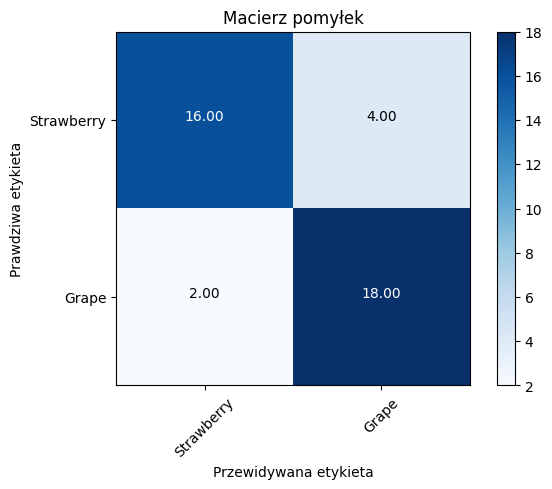

In [36]:
# Definiowanie etykiet do wyświetlenia w macierzy pomyłek
cm_plot_labels = ['Strawberry', 'Grape']

# Rysowanie macierzy pomyłek z odpowiednimi etykietami i tytułem
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Macierz pomyłek')
